In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [69]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [101]:
# Cargamos el dataset
ruta = r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 4 - Dataset Red Wine Quality\winequality-red.csv"
data = pd.read_csv(ruta)

In [103]:
# Realizamos lectura de los Datos para el análisis exploratorio
data.head(40)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [105]:
data.shape

(1599, 12)

In [107]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [109]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

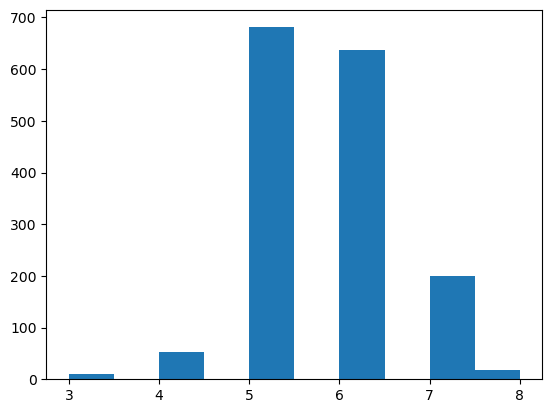

In [111]:
plt.hist(data.quality)

<Axes: xlabel='alcohol', ylabel='volatile acidity'>

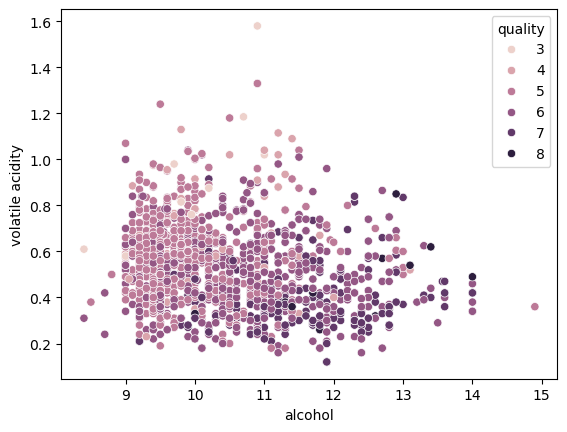

In [129]:
sns.scatterplot(x = "alcohol", y = "volatile acidity", hue = "quality", data = data)

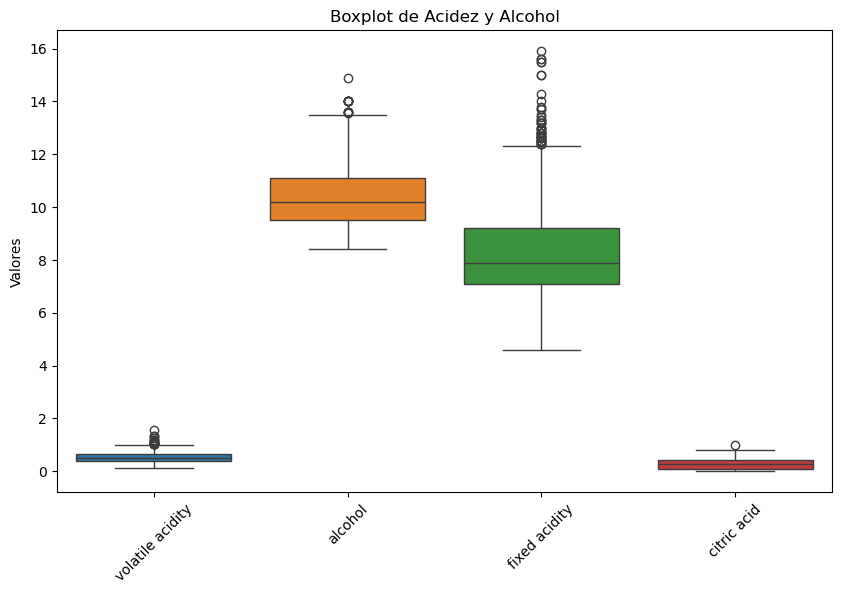

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['volatile acidity', 'alcohol', 'fixed acidity', 'citric acid']])
plt.xticks(rotation=45)
plt.title('Boxplot de Acidez y Alcohol')
plt.ylabel('Valores')
plt.show()

In [133]:
predictors_col = ["volatile acidity", "alcohol", "fixed acidity", "citric acid"]
target_col = ['quality']

In [135]:
predictors = data[predictors_col]
target = data[target_col]

In [137]:
predictors

,volatile acidity,alcohol,fixed acidity,citric acid
0,0.700,9.4,7.4,0.00
1,0.880,9.8,7.8,0.00
2,0.760,9.8,7.8,0.04
3,0.280,9.8,11.2,0.56
4,0.700,9.4,7.4,0.00
...,...,...,...,...
1594,0.600,10.5,6.2,0.08
1595,0.550,11.2,5.9,0.10
1596,0.510,11.0,6.3,0.13
1597,0.645,10.2,5.9,0.12


In [139]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [141]:
corr = predictors.corr()
corr

,volatile acidity,alcohol,fixed acidity,citric acid
volatile acidity,1.000000,-0.202288,-0.256131,-0.552496
alcohol,-0.202288,1.000000,-0.061668,0.109903
fixed acidity,-0.256131,-0.061668,1.000000,0.671703
citric acid,-0.552496,0.109903,0.671703,1.000000


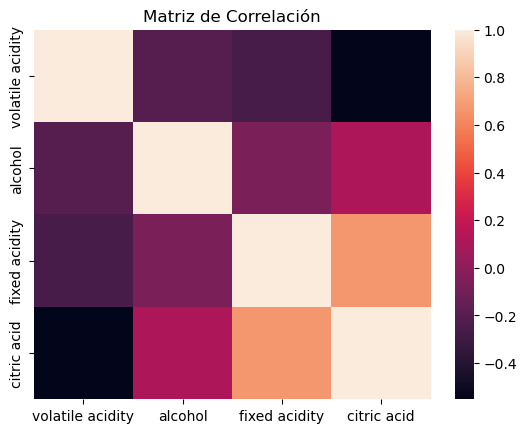

In [143]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [145]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [147]:
tree = DecisionTreeClassifier()

In [149]:
arbol = tree.fit(X_train, y_train)

[Text(0.5862106839239886, 0.9791666666666666, 'x[1] <= 10.525\ngini = 0.642\nsamples = 1279\nvalue = [9.0, 43.0, 551.0, 506.0, 157.0, 13.0]'),
 Text(0.3821133968334843, 0.9375, 'x[2] <= 10.05\ngini = 0.541\nsamples = 786\nvalue = [6.0, 27.0, 465.0, 256.0, 30.0, 2.0]'),
 Text(0.2527533637152778, 0.8958333333333334, 'x[1] <= 9.95\ngini = 0.507\nsamples = 675\nvalue = [3, 23, 430, 197, 21, 1]'),
 Text(0.1407960163798309, 0.8541666666666666, 'x[2] <= 9.25\ngini = 0.433\nsamples = 480\nvalue = [2, 15, 342, 116, 5, 0]'),
 Text(0.05610516681763285, 0.8125, 'x[1] <= 9.075\ngini = 0.456\nsamples = 436\nvalue = [2.0, 15.0, 300.0, 115.0, 4.0, 0.0]'),
 Text(0.012077294685990338, 0.7708333333333334, 'x[3] <= 0.275\ngini = 0.615\nsamples = 19\nvalue = [0, 3, 7, 9, 0, 0]'),
 Text(0.007246376811594203, 0.7291666666666666, 'x[2] <= 7.6\ngini = 0.544\nsamples = 13\nvalue = [0, 3, 2, 8, 0, 0]'),
 Text(0.004830917874396135, 0.6875, 'x[3] <= 0.015\ngini = 0.656\nsamples = 8\nvalue = [0, 3, 2, 3, 0, 0]'),
 

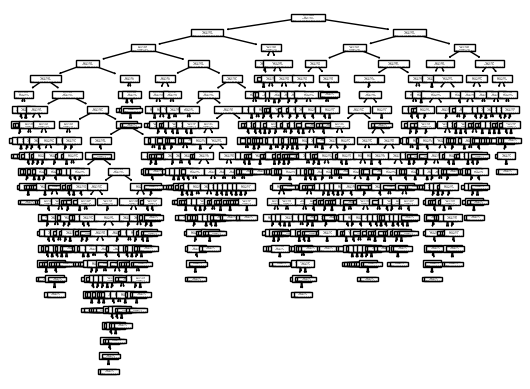

In [154]:
plot_tree(arbol)

In [156]:
predicciones = arbol.predict(X_test)

In [158]:
predicciones

array([5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 7, 5, 5, 6, 5, 7, 5, 6, 8, 5, 5, 6,
       7, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5,
       6, 7, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 7, 6, 5, 7, 6,
       8, 6, 6, 6, 7, 6, 6, 7, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6,
       7, 5, 6, 5, 5, 5, 5, 5, 5, 6, 3, 6, 3, 5, 6, 7, 6, 7, 6, 5, 6, 5,
       7, 5, 7, 5, 3, 7, 5, 4, 5, 6, 6, 6, 5, 6, 6, 5, 7, 5, 5, 6, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 6, 7, 7, 7, 6, 6, 5, 7, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 7, 5, 7, 5,
       7, 5, 7, 5, 6, 5, 7, 7, 5, 6, 6, 6, 7, 5, 4, 6, 5, 7, 7, 5, 3, 6,
       5, 7, 5, 6, 5, 5, 7, 4, 5, 6, 6, 6, 6, 5, 5, 6, 8, 6, 6, 6, 7, 5,
       5, 6, 7, 6, 4, 5, 5, 6, 6, 5, 7, 5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5,
       7, 7, 5, 7, 5, 4, 7, 5, 5, 6, 5, 6, 4, 5, 5, 6, 6, 6, 6, 6, 5, 7,
       7, 7, 6, 5, 6, 6, 5, 5, 5, 6, 3, 6, 8, 6, 8, 6, 7, 6, 5, 5, 5, 7,
       5, 7, 5, 7, 6, 6, 6, 5, 6, 6, 5, 7, 7, 6, 5,

In [160]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,0,2,5,3,0,0
5,4,2,84,32,6,2
6,1,3,34,71,20,3
7,0,0,2,14,26,0
8,0,0,1,1,2,1


In [162]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.575

In [164]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.585473424486712

In [166]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.575

In [168]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.5783735417324448